# Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling

In [1]:
#Import necessary packages and use given style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os #adding to make it easier to save to outputs folder
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

import spacy
from tqdm import tqdm
from collections import Counter

plt.style.use('seaborn-v0_8-dark') 

In [2]:
#Load SOTU.csv from data folder
sou = pd.read_csv("data/SOTU.csv")

nlp = spacy.load("en_core_web_sm")

### Preprocess data (run once)

In [5]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

processed_docs = sou['Text'].apply(preprocess_text)

processed_docs.to_pickle("data/processed_docs.pkl")

### Read in preprocessed data

In [6]:
texts = pd.read_pickle("data/processed_docs.pkl")
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [7]:
# train LDA model with 18 topics
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, random_state=42)

In [8]:
# print the top 10 words for each topic
lda_model.show_topics(num_words = 10)

[(np.int64(9),
  '0.009*"mexico" + 0.006*"program" + 0.005*"cent" + 0.005*"texas" + 0.004*"tariff" + 0.003*"minister" + 0.003*"convention" + 0.003*"article" + 0.003*"board" + 0.003*"corporation"'),
 (np.int64(2),
  '0.015*"americans" + 0.011*"program" + 0.009*"tonight" + 0.008*"billion" + 0.008*"challenge" + 0.007*"budget" + 0.006*"fight" + 0.005*"percent" + 0.005*"thank" + 0.005*"worker"'),
 (np.int64(5),
  '0.010*"americans" + 0.008*"tonight" + 0.007*"program" + 0.006*"today" + 0.004*"billion" + 0.004*"thank" + 0.004*"mexico" + 0.004*"budget" + 0.004*"goal" + 0.003*"method"'),
 (np.int64(11),
  '0.006*"mexico" + 0.006*"program" + 0.006*"june" + 0.005*"spain" + 0.005*"convention" + 0.004*"gold" + 0.004*"island" + 0.004*"british" + 0.004*"article" + 0.004*"tariff"'),
 (np.int64(14),
  '0.006*"mexico" + 0.005*"program" + 0.004*"americans" + 0.004*"convention" + 0.004*"june" + 0.004*"indian" + 0.004*"tariff" + 0.004*"tonight" + 0.003*"company" + 0.003*"worker"'),
 (np.int64(15),
  '0.006

In [9]:
# print the topic distribution for the first speech
lda_model.get_document_topics(corpus[0])

[(2, np.float32(0.9988718))]

In [48]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.039165 -0.000692       1        1  24.099819
2     -0.048103  0.004667       2        1  18.116020
17    -0.036294 -0.005331       3        1  11.103746
7      0.018184 -0.003395       4        1   9.488248
3      0.023842  0.005324       5        1   6.641707
11     0.012540 -0.001042       6        1   5.548906
9      0.011178 -0.003918       7        1   5.475735
15     0.000344  0.003458       8        1   5.243145
0      0.010348 -0.000373       9        1   4.514622
1     -0.001307 -0.000451      10        1   2.114797
16     0.002058 -0.004738      11        1   2.101177
4      0.004839  0.003684      12        1   1.587876
10    -0.015663 -0.011088      13        1   1.330167
13     0.006806 -0.000812      14        1   0.896337
14    -0.001139  0.002445      15        1   0.854306
8      0.000817  0.002552      16        1   0.395432
5     -0.016518  0.002936      17        1   0.329059
12    -0.011097  0.006775      18        1   0.158904, topic_info=           Term         Freq        Total Category  logprob  loglift
199     program  1181.000000  1181.000000  Default  30.0000  30.0000
9     americans  1024.000000  1024.000000  Default  29.0000  29.0000
259     tonight   630.000000   630.000000  Default  28.0000  28.0000
353      mexico   867.000000   867.000000  Default  27.0000  27.0000
403      budget   716.000000   716.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
186        port     0.783724   437.774794  Topic18  -5.9602   0.1192
739     surplus     0.778153   462.944827  Topic18  -5.9674   0.0562
757  convention     0.794523   663.223323  Topic18  -5.9466  -0.2825
560      tariff     0.762538   493.138582  Topic18  -5.9877  -0.0273
29        china     0.750091   398.622713  Topic18  -6.0041   0.1691

[1060 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
899       1  0.330687   30th
899       2  0.093006   30th
899       3  0.062004   30th
899       4  0.103340   30th
899       5  0.056837   30th
...     ...       ...    ...
293      14  0.007113  young
293      15  0.010669  young
293      16  0.007113  young
293      17  0.003556  young
293      18  0.003556  young

[7730 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 18, 8, 4, 12, 10, 16, 1, 2, 17, 5, 11, 14, 15, 9, 6, 13])

### BERTopic

- Train a BERTopic model with a `min_topic_size` of 3 *Hint: use `BERTopic` to instantiate the model and specify `min_topic_size` in here. Actually fit the model using `fit_transform`, which `docs` passed into this.*
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization of the topics (see topic_model.visualize_topics())

In [3]:
docs = sou['Text'].to_list()

In [4]:
# train the model - this takes about 30 seconds
topic_model = BERTopic(min_topic_size=3, calculate_probabilities=True)

vectorizer_model = CountVectorizer()

topics, probs = topic_model.fit_transform(docs)

topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)

In [5]:
# output the top 10 words for each topic - hint see get_topic_info
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,52,-1_the_of_and_to,"[the, of, and, to, in, be, by, that, for, which]",[\nTo the Congress of the United States:\nYour...
1,0,88,0_we_and_to_our,"[we, and, to, our, the, in, of, that, for, is]","[\nMr. President, Mr. Speaker, Members of the ..."
2,1,11,1_the_of_in_and,"[the, of, in, and, to, is, be, for, that, it]",[\nTo the Senate and House of Representatives:...
3,2,10,2_the_of_to_and,"[the, of, to, and, in, which, on, be, our, by]",[\nThe Senate and House of Representatives of ...
4,3,8,3_the_of_to_and,"[the, of, to, and, in, be, by, which, that, it]",[\nFellow-Citizens of the Senate and House of ...
5,4,8,4_of_the_and_to,"[of, the, and, to, in, we, that, our, is, it]",[\nGENTLEMEN OF THE CONGRESS:\nThe year that h...
6,5,8,5_the_of_and_to,"[the, of, and, to, in, be, that, by, for, it]",[\nFellow-Citizens of the Senate and of the Ho...
7,6,8,6_the_of_and_to,"[the, of, and, to, in, is, be, that, by, for]",[\nTo the Senate and House of Representatives:...
8,7,7,7_the_of_to_which,"[the, of, to, which, and, with, be, been, have...",[\nFellow-Citizens of the Senate and House of ...
9,8,6,8_the_of_and_to,"[the, of, and, to, in, that, which, be, by, it]",[\nTo the Congress of the United States:\nThe ...


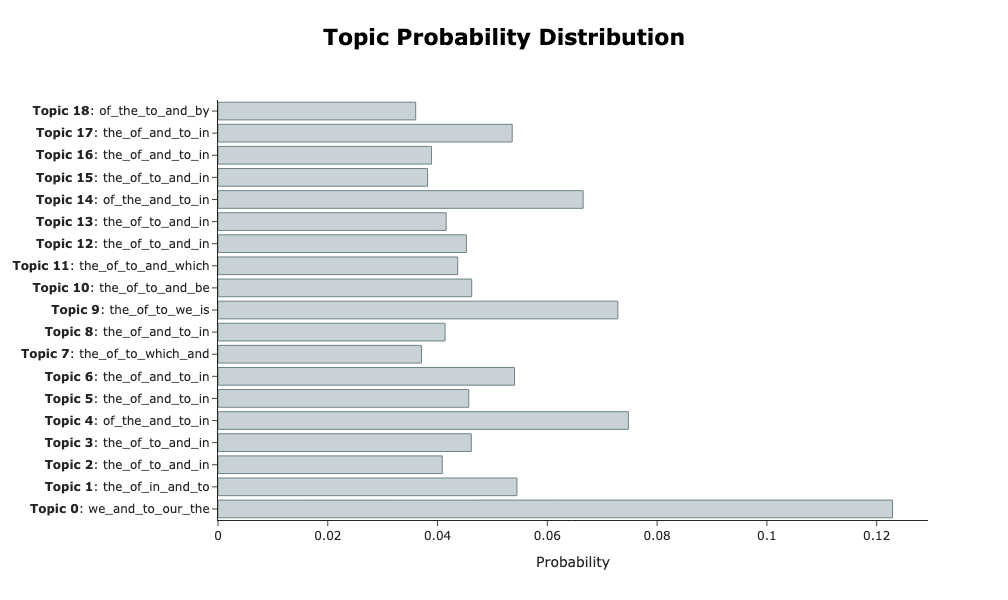

In [13]:
# output the topic distribution for the first speech
# hint: check out approximate_distribution() and visualize_distribution()
distribution, _ = topic_model.approximate_distribution(docs[0])
topic_model.visualize_distribution(distribution[0])

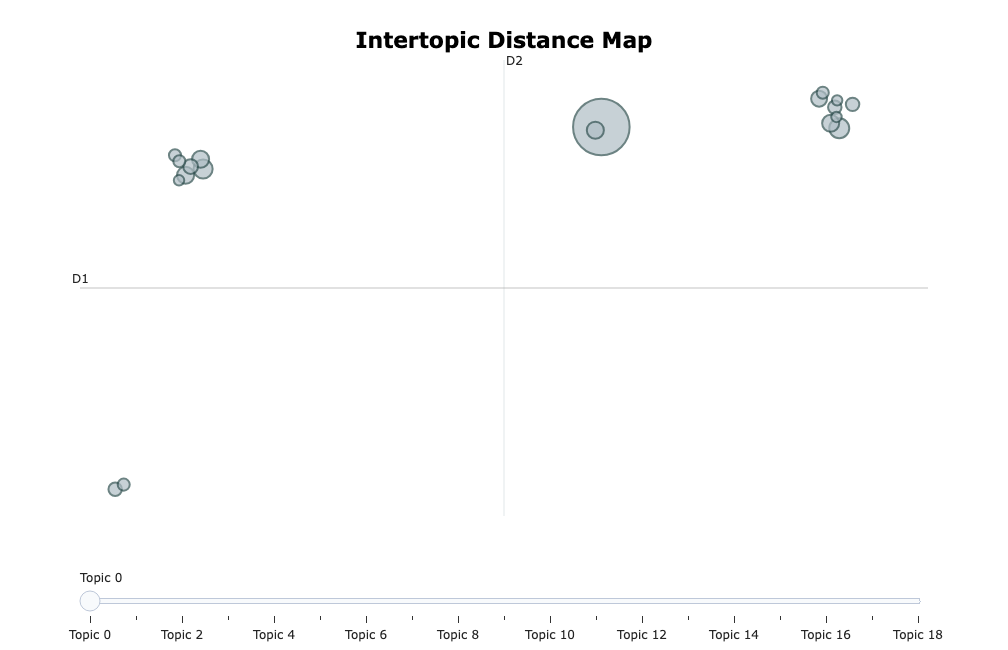

In [14]:
# run this cell to visualize the topics
topic_model.visualize_topics()